In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv


In [2]:
df = pd.read_csv("/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.subplots as sp
import plotly.graph_objs as go
import missingno as msno
#Scalign
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [4]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


<AxesSubplot:>

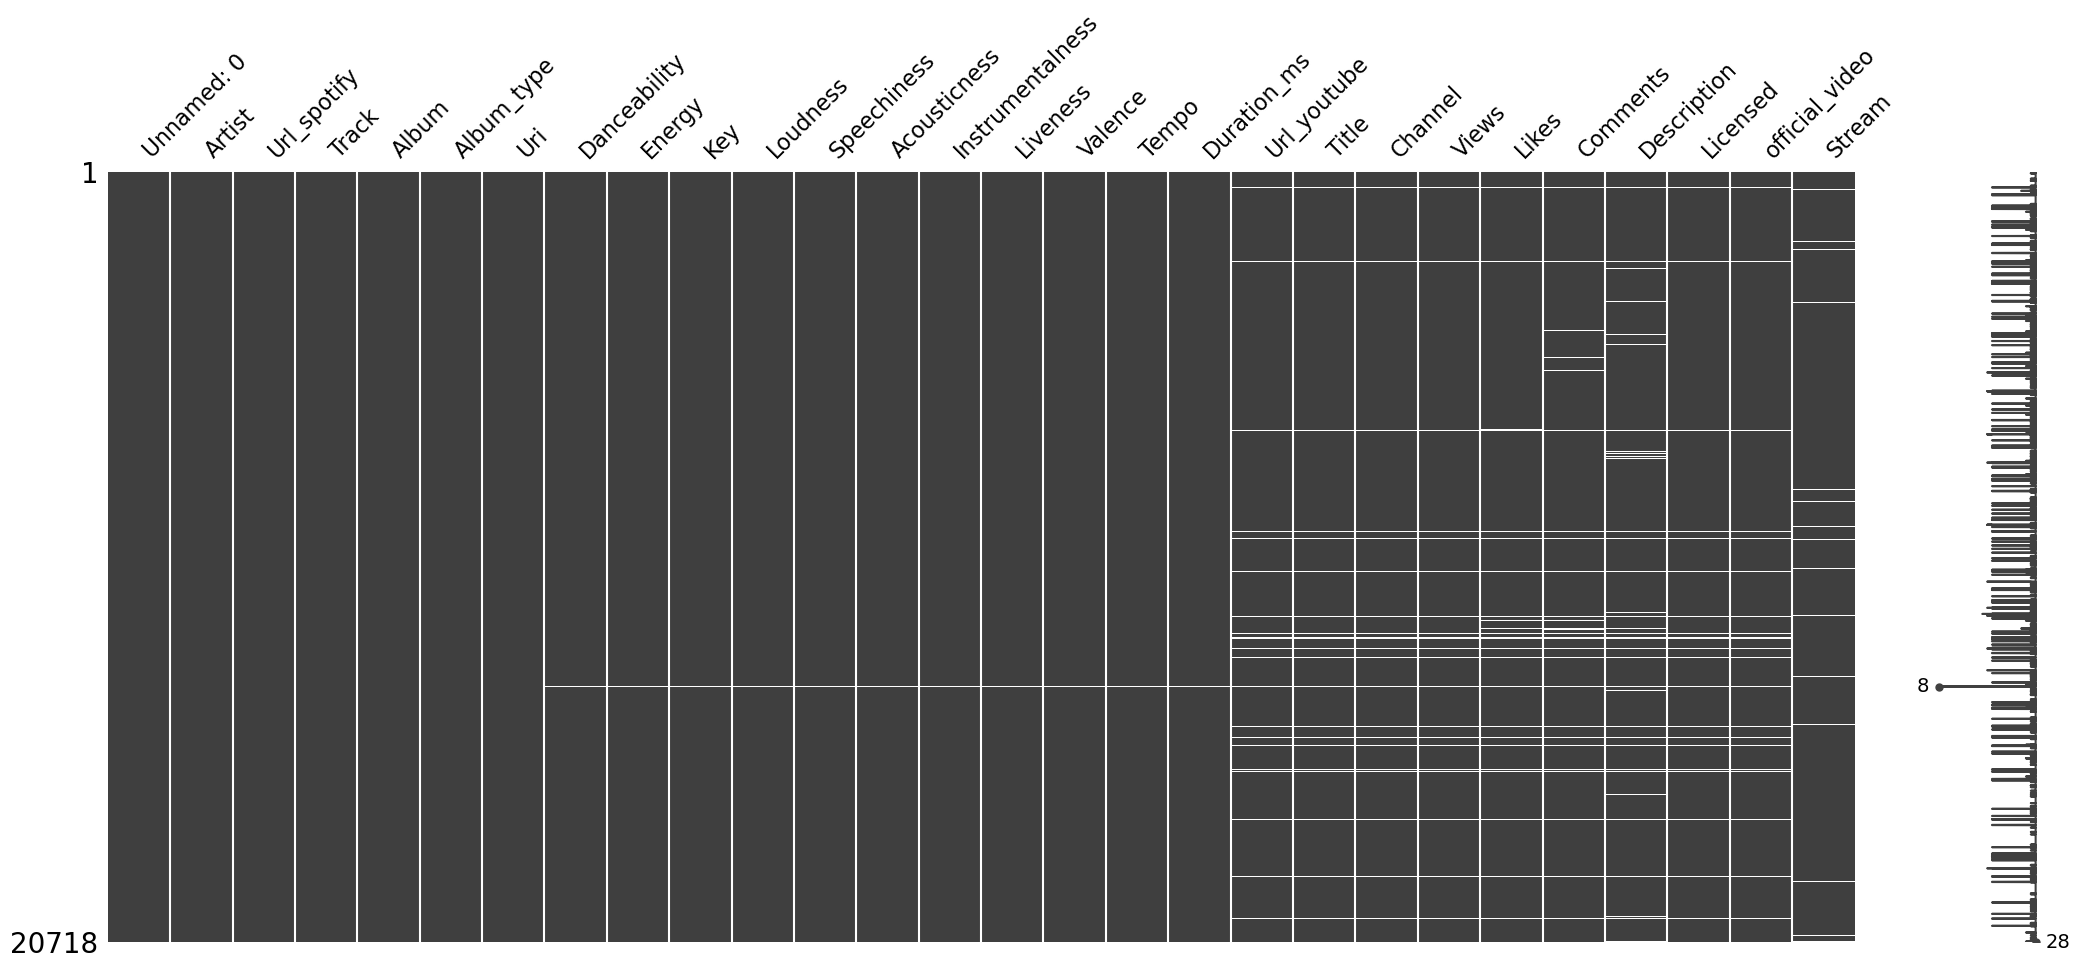

In [5]:
msno.matrix(df)

In [6]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [7]:
url_cols = ['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Title', 'Description']
df.drop(url_cols, axis=1, inplace=True)

In [8]:
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.772,138.559,222640.0,Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.852,92.761,200173.0,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.551,108.014,215150.0,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.578,120.423,233867.0,Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.525,167.953,340920.0,Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


In [9]:
df.dropna(inplace=True)

In [10]:
duplicates = df.duplicated()

print(df[duplicates])

Empty DataFrame
Columns: [Artist, Track, Album, Album_type, Danceability, Energy, Key, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms, Channel, Views, Likes, Comments, Licensed, official_video, Stream]
Index: []

[0 rows x 22 columns]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19549 entries, 0 to 20717
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19549 non-null  object 
 1   Track             19549 non-null  object 
 2   Album             19549 non-null  object 
 3   Album_type        19549 non-null  object 
 4   Danceability      19549 non-null  float64
 5   Energy            19549 non-null  float64
 6   Key               19549 non-null  float64
 7   Loudness          19549 non-null  float64
 8   Speechiness       19549 non-null  float64
 9   Acousticness      19549 non-null  float64
 10  Instrumentalness  19549 non-null  float64
 11  Liveness          19549 non-null  float64
 12  Valence           19549 non-null  float64
 13  Tempo             19549 non-null  float64
 14  Duration_ms       19549 non-null  float64
 15  Channel           19549 non-null  object 
 16  Views             19549 non-null  float6

In [12]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04
mean,0.621059,0.635170,5.294337,-7.633179,0.095392,0.289106,0.055292,0.191226,0.528950,120.605702,2.246281e+05,9.545626e+07,6.700487e+05,2.786371e+04,1.371101e+08
std,0.165489,0.213555,3.579338,4.618839,0.106243,0.285908,0.192519,0.165197,0.245228,29.619340,1.269126e+05,2.775744e+08,1.805054e+06,1.959074e+05,2.463589e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.519000,0.508000,2.000000,-8.772000,0.035700,0.044400,0.000000,0.094000,0.339000,96.990000,1.802400e+05,1.911528e+06,2.238000e+04,5.310000e+02,1.781089e+07
50%,0.639000,0.666000,5.000000,-6.516000,0.050700,0.190000,0.000002,0.125000,0.536000,119.964000,2.132530e+05,1.491440e+07,1.279090e+05,3.343000e+03,4.979139e+07
75%,0.742000,0.797000,8.000000,-4.929000,0.104000,0.470000,0.000433,0.234000,0.725000,139.951000,2.519200e+05,7.152989e+07,5.266400e+05,1.449300e+04,1.390828e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [13]:
df['Artist'].unique()

array(['Gorillaz', 'Red Hot Chili Peppers', '50 Cent', ...,
       'Grupo Frontera', 'LE SSERAFIM', 'SICK LEGEND'], dtype=object)

In [14]:
df['Album_type'].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [15]:
album_type_count = df['Album_type'].value_counts()
print(album_type_count)

album          14148
single          4689
compilation      712
Name: Album_type, dtype: int64


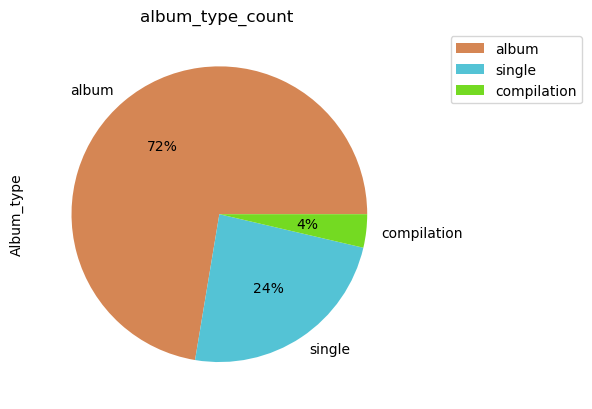

In [16]:
album_type_count.plot.pie(y='single  ',colors=["#D58654", "#54C3D5","#74DA22"],autopct='%1.0f%%').legend(bbox_to_anchor=(1.5, 1))
plt.title('album_type_count ')
plt.show()

In [17]:
df_gr=df.groupby('Album_type').sum().loc[:,['Views','Stream','Likes','Comments']]

In [18]:
df_gr

,Views,Stream,Likes,Comments
Album_type,,,,
album,1.412726e+12,2.136731e+12,9.360933e+09,405314775.0
compilation,5.893584e+10,6.091182e+10,3.775070e+08,12547031.0
single,3.944124e+11,4.827234e+11,3.360342e+09,126845777.0


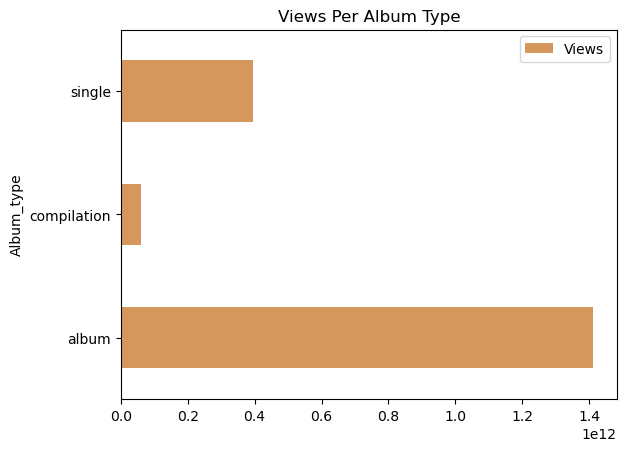

In [19]:
df_gr.plot.barh(y='Views',color='#d6975c')
plt.title('Views Per Album Type')
plt.show()

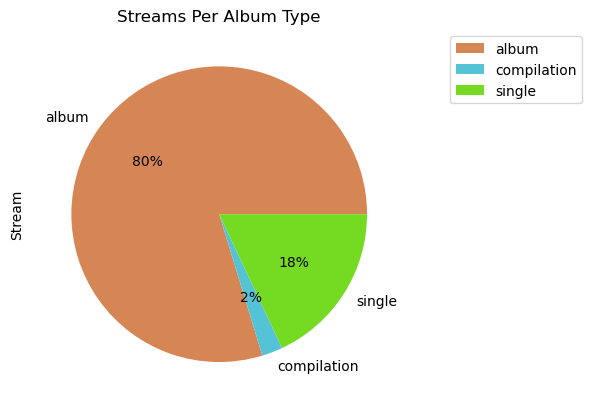

In [20]:
df_gr.plot.pie(y='Stream',colors=["#D58654", "#54C3D5","#74DA22"],autopct='%1.0f%%').legend(bbox_to_anchor=(1.5, 1))
plt.title('Streams Per Album Type')
plt.show()

In [21]:
df.sort_values('Views',ascending=False).head(5)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
1147,Luis Fonsi,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.1530,0.198,...,0.839,177.928,229360.0,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,True,True,1.506598e+09
365,Daddy Yankee,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.1530,0.198,...,0.839,177.928,229360.0,LuisFonsiVEVO,8.079647e+09,50788626.0,4252791.0,True,True,1.506598e+09
12452,Ed Sheeran,Shape of You,÷ (Deluxe),album,0.825,0.652,1.0,-3.183,0.0802,0.581,...,0.931,95.977,233713.0,Ed Sheeran,5.908398e+09,31047780.0,1130327.0,True,True,3.362005e+09
14580,Charlie Puth,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,0.689,0.481,10.0,-7.503,0.0815,0.369,...,0.283,80.025,229526.0,Wiz Khalifa Music,5.773798e+09,40147674.0,2127346.0,True,True,1.521255e+09
12469,Wiz Khalifa,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,0.689,0.481,10.0,-7.503,0.0815,0.369,...,0.283,80.025,229526.0,Wiz Khalifa Music,5.773797e+09,40147618.0,2127345.0,True,True,1.521255e+09


In [22]:
Views_sorted=df.sort_values('Views',ascending=False).head(5).loc[:,['Track','Views','Artist']]


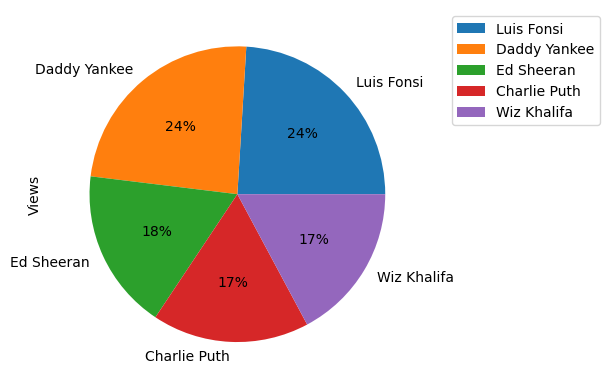

In [23]:
Views_sorted.set_index('Artist').plot.pie(y='Views',autopct='%1.0f%%').legend(bbox_to_anchor=(1.5, 1))

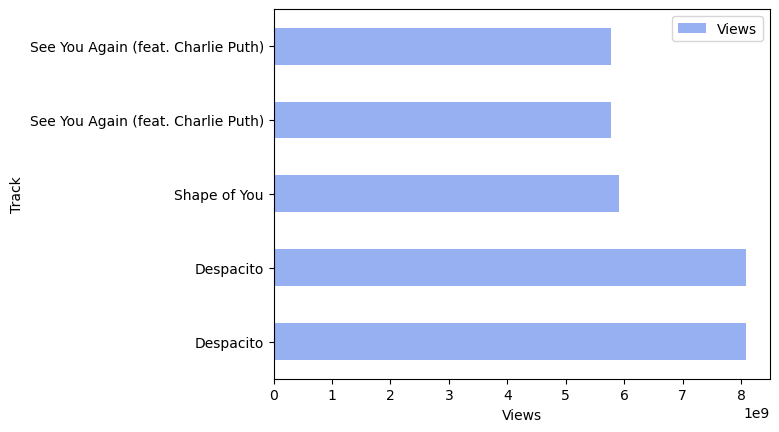

In [24]:
Views_sorted.plot.barh(x='Track',y='Views',color='#96B0F1')
plt.xlabel('Views')
plt.show()

In [25]:
top10_views = df.nlargest(10, 'Views')

# Top 10 songs based on comments
top10_comments = df.nlargest(10, 'Comments')

# Top 10 songs based on likes
top10_likes = df.nlargest(10, 'Likes')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning:

Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning:

Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning:

Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning:

Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning:

Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 45224 (\N{HANGUL SYLLABLE NAM}) m

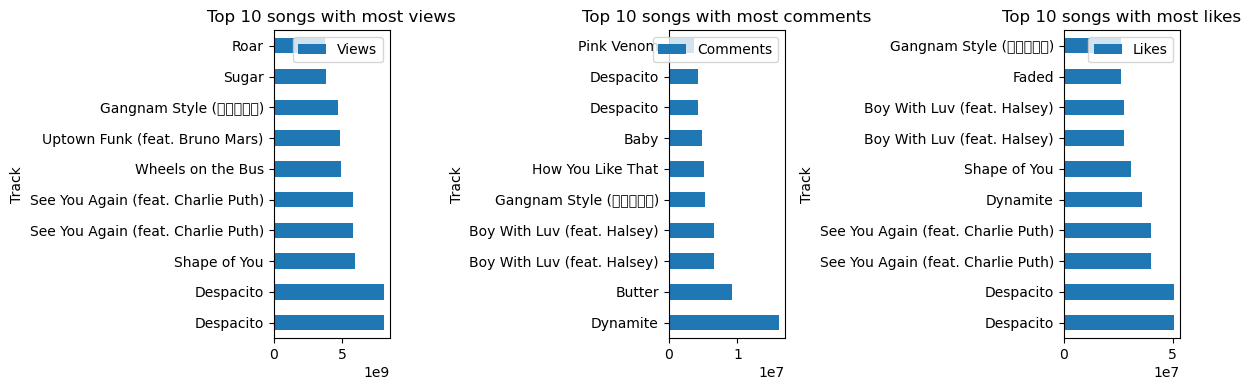

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Top 10 songs with most views
top10_views.plot(kind='barh', x='Track', y='Views', ax=axs[0])
axs[0].set_title('Top 10 songs with most views')

# Top 10 songs with most comments
top10_comments.plot(kind='barh', x='Track', y='Comments', ax=axs[1])
axs[1].set_title('Top 10 songs with most comments')

# Top 10 songs with most likes
top10_likes.plot(kind='barh', x='Track', y='Likes', ax=axs[2])
axs[2].set_title('Top 10 songs with most likes')

fig.tight_layout()


plt.show()

In [27]:
top_songs = df.sort_values('Stream', ascending=False).head(10)
top_songs[['Track', 'Energy', 'Danceability', 'Acousticness']]

,Track,Energy,Danceability,Acousticness
15250,Blinding Lights,0.730,0.514,0.00146
12452,Shape of You,0.652,0.825,0.58100
19186,Someone You Loved,0.405,0.501,0.75100
17937,rockstar (feat. 21 Savage),0.520,0.585,0.12400
17938,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,0.53300
17445,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,0.53300
13503,One Dance,0.625,0.792,0.00776
16028,Closer,0.524,0.748,0.41400
16099,Closer,0.524,0.748,0.41400
14030,Believer,0.780,0.776,0.06220


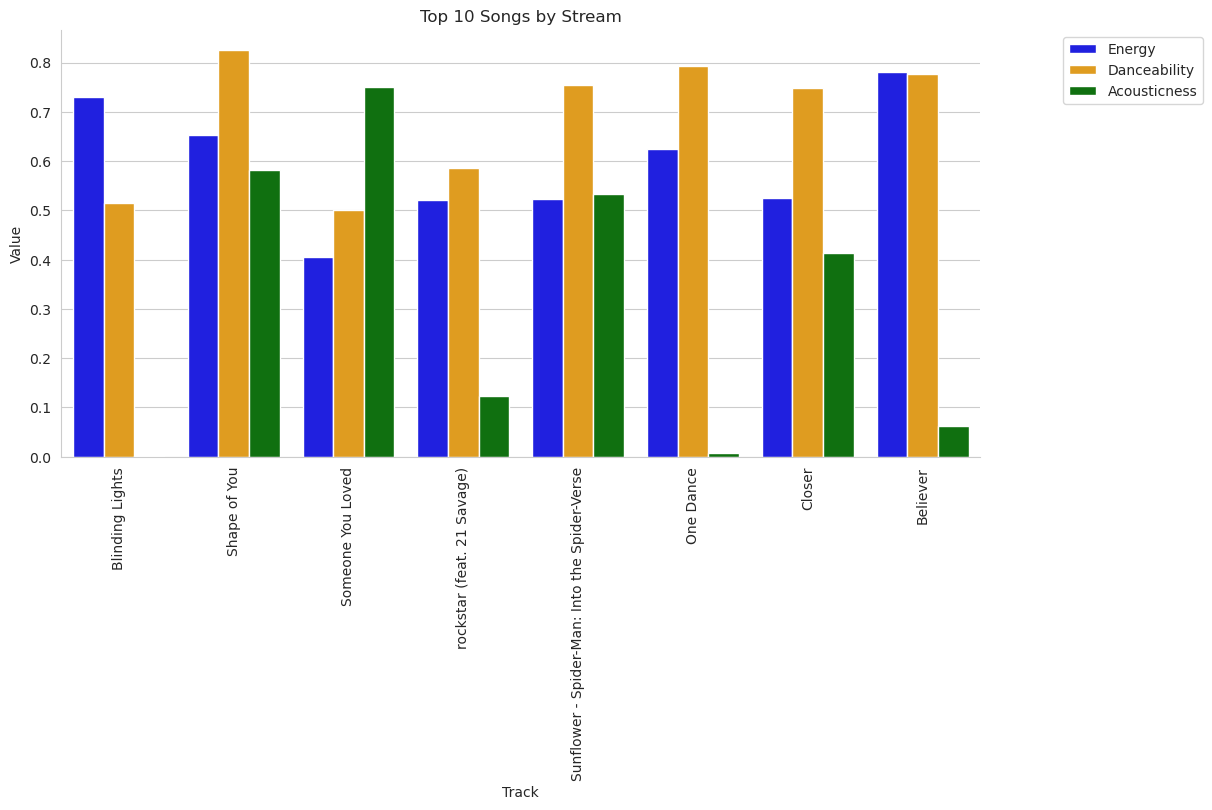

In [28]:
top_songs_melt = top_songs.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness'],
                                var_name='Attribute', value_name='Value')

sns.set_style('whitegrid')
sns.catplot(x='Track', y='Value', hue='Attribute', data=top_songs_melt, kind='bar',
            palette={'Energy': 'blue', 'Danceability': 'orange', 'Acousticness': 'green'},
            aspect=2, legend=False)


plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Top 10 Songs by Stream')
plt.xlabel('Track')
plt.ylabel('Value')

plt.xticks(rotation=90)
plt.show()

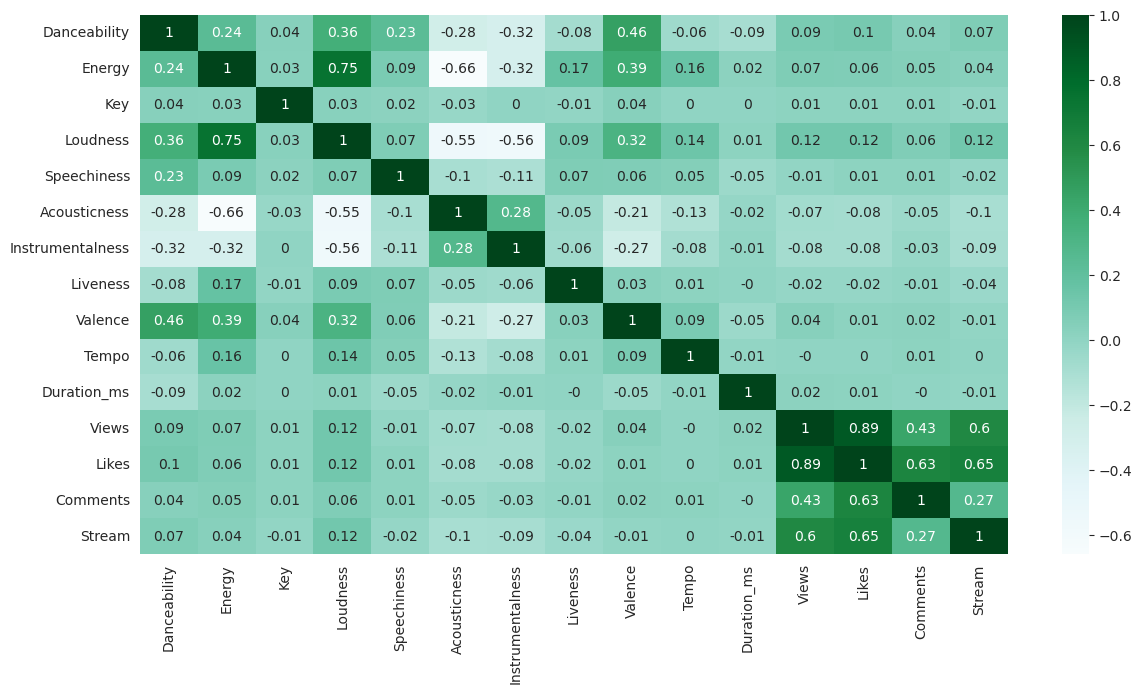

In [29]:
fig,ax=plt.subplots(figsize=(14, 7))
sns.heatmap(data=df.corr().round(2),annot=True,cmap="BuGn")
plt.show()

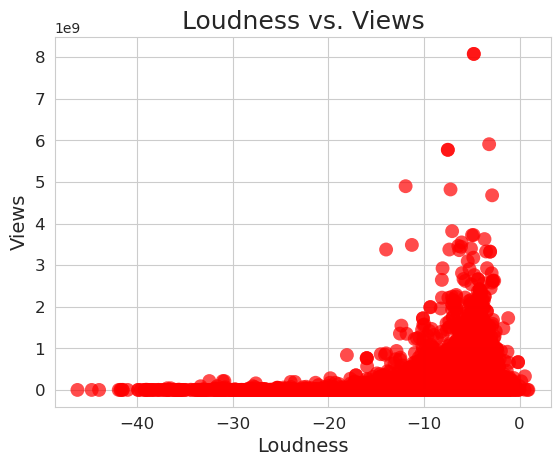

In [30]:
plt.scatter(df['Loudness'], df['Views'], s=100, c='red', alpha=0.7, edgecolors='none')
plt.title('Loudness vs. Views', fontsize=18)
plt.xlabel('Loudness', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.show()

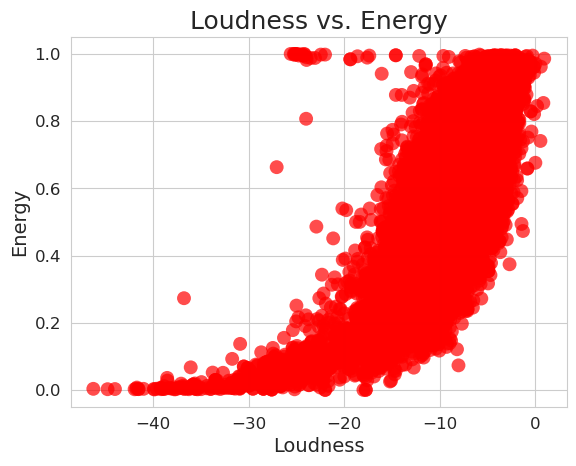

In [31]:
plt.scatter(df['Loudness'],df['Energy'], s=100, c='red', alpha=0.7, edgecolors='none')
plt.title('Loudness vs. Energy', fontsize=18)
plt.xlabel('Loudness', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.show()

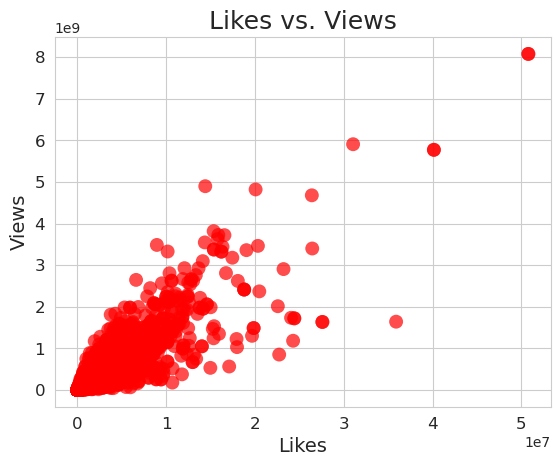

In [32]:
plt.scatter(df['Likes'], df['Views'], s=100, c='red', alpha=0.7, edgecolors='none')
plt.title('Likes vs. Views', fontsize=18)
plt.xlabel('Likes', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.show()

In [33]:
Dance_sort = df.sort_values(by = 'Valence', ascending=False).head(10)
Dance_sort

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream
18514,Toby Fox,Spider Dance,UNDERTALE Soundtrack,album,0.644,0.826,1.0,-9.578,0.0544,0.04310,...,0.993,114.928,106435.0,Misaki,12880861.0,153628.0,9116.0,False,False,32276501.0
1934,Los Tucanes De Tijuana,El Tucanazo,Tucanes De Oro ... Secuestro De Amor,album,0.832,0.843,4.0,-7.595,0.0449,0.04770,...,0.991,146.141,174160.0,LosTucanesVEVO,19046046.0,87034.0,2032.0,True,True,62966387.0
6912,Mi Banda El Mexicano,Feliz Feliz,Mi Mexico Querido,album,0.809,0.815,0.0,-6.613,0.0331,0.06750,...,0.990,135.259,217522.0,Discos Musart,7206658.0,48728.0,517.0,True,True,92848591.0
5449,Los Dareyes De La Sierra,La Recia,Con Banda,album,0.808,0.668,5.0,-4.688,0.0446,0.68100,...,0.989,149.879,150027.0,Luis Arenas Garcia,2760664.0,12431.0,265.0,False,False,10607889.0
20537,BoyWithUke,Long Drives,Serotonin Dreams,album,0.854,0.667,1.0,-7.040,0.1110,0.51300,...,0.986,130.021,159933.0,BoyWithUkeVEVO,40463692.0,1043598.0,24547.0,True,True,72517528.0
3717,The Doobie Brothers,What a Fool Believes,Minute by Minute,album,0.758,0.378,8.0,-15.308,0.0449,0.28400,...,0.985,120.736,223867.0,RHINO,12802696.0,125045.0,6362.0,True,True,206600175.0
6936,Banda Machos,Al gato y al ratón,Sangre de indio,album,0.817,0.917,7.0,-6.519,0.0483,0.65400,...,0.985,141.987,162800.0,La musica de Mexico RD Ramon Maldonado Manager,127009.0,766.0,59.0,False,False,20985345.0
6288,Donna Summer,She Works Hard For The Money,She Works Hard For The Money,album,0.758,0.638,8.0,-13.010,0.0378,0.00486,...,0.984,136.502,320840.0,Pablo Ch.B.73,333458.0,6926.0,0.0,False,False,40348150.0
2349,Bronco,Sergio el Bailador,Sergio El Bailador,album,0.789,0.670,7.0,-12.263,0.0578,0.30600,...,0.984,89.532,169600.0,Grupos Y Bandas De Ayer Y Hoy,7006.0,73.0,2.0,False,False,64503651.0
9413,I Monster,The Blue Wrath,Remixed,album,0.848,0.689,4.0,-5.618,0.0422,0.63500,...,0.982,102.100,92693.0,Dharma Records,2224661.0,32798.0,2603.0,True,True,3040501.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot:xlabel='Valence', ylabel='Density'>

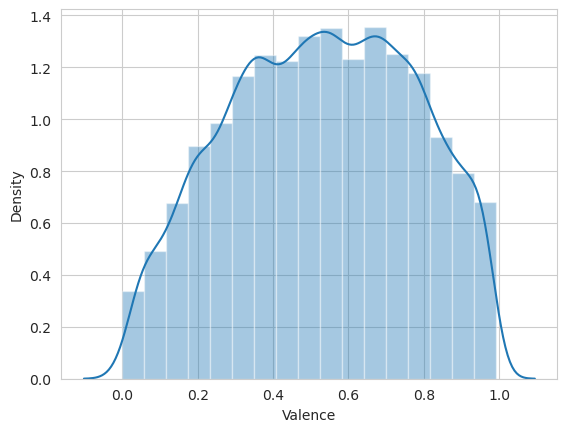

In [34]:
sns.distplot(df['Valence'],bins=17)